# Estimation

Open in Google Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/12-Estimation.ipynb)

Suppose that we want to estimate the share of persons who have read at least one of our magazines. One way that we can try to estimate this is by conducting a survey and simply ask a sample of randomly chosen persons whether they have read one of our magazines or no.

Assume that the share of persons who have read one of our magazines is $p$. We select $n$ persons at random and record their answer to the question of whether they have read one of our magazines (1) or no (0).

We sample 1,000 persons and find that 300 of them answer yes to our question. What is the best estimate for the share of persons who have read one of our magazines?

In order to answer this question, we need to define the sense in which we mean "best estimate". One way to define this is to say that the best estimate is the value of $p$ that maximizes the likelihood of observing the data that we have observed. This is known as the maximum likelihood estimate.

The likelihood of observing the data that we have observed is given by the probability mass function of the binomial distribution. The probability mass function of the binomial distribution is given by

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k},
$$

where $X$ is the random variable that counts the number of persons who have read one of our magazines, $n$ is the number of persons that we have sampled, and $x$ is the number of persons who have read one of our magazines. In our case, $n = 1,000$ and $k = 300$. So what is the value of p that maximizes this probability?

We can calculate the first derivative of the likelihood function with respect to $p$ and set it equal to zero. This will give us the value of $p$ that maximizes the likelihood function. This is known as maximum likelihood (ML) estimation.

The first derivative of the likelihood function with respect to $p$ is given by

$$
\frac{d}{dp} P(X = k) = \binom{n}{k} k p^{k - 1} (1 - p)^{n - k} - \binom{n}{k} p^k (n - k) (1 - p)^{n - k - 1}.
$$

Now we need to find where this derivative is equal to zero:

$$
\binom{n}{k} k p^{k - 1} (1 - p)^{n - k} - \binom{n}{k} p^k (n - k) (1 - p)^{n - k - 1} = 0.
$$

Dividing both sides by $\binom{n}{k} p^{k - 1} (1 - p)^{n - k - 1}$, we get

$$
k (1 - p) - p (n - k) = 0.
$$

Now we can solve for $p$ 

$$
p = \frac{k}{n} = \frac{k}{n}
$$

We call this solution the maximum likelihood estimate (MLE) of $p$ and denote it by $\hat{p}_{ML}$.

$$
\hat{p}_{ML} = \frac{k}{n}
$$


For the binomial distribution the MLE is simply the share of persons who have read one of our magazines in the sample. In our case this is $300/1000 = 0.3$.


## Expected Value and Variance of the Maximum Likelihood Estimate

When we study the statistical properties of an estimator (expected value and variance in our case), we are interested in knowing how the estimator behaves in large samples (asymptotically). In our case, we are interested in knowing how the sample proportion of readers behaves as the sample size increases. 

:::{.callout-important}
## Estimator

When we study the statistical properties of an estimator (a function of the observations) we must view it as a function (a random variable).
:::

The expected value of the ML estimator of $p$ is:

$$
\begin{align*}
E(\hat{p}_{ML}) & = E\left(\frac{1}{n} \sum_{i = 1}^{n} X_i \right) \\
& = \frac{1}{n} \sum_{i = 1}^{n} E(X_i) \\
& = \frac{1}{n} \sum_{i = 1}^{n} p \\
& = p.
\end{align*}
$$

So the expected value of the sample proportion of readers is $p$. This means that the sample proportion of readers is an **unbiased** estimator of the share of persons who have read one of our magazines.

What is the variance of this estimate? The variance of the sample proportion of readers is given by

$$
\begin{align*}
\text{Var}(\hat{p}_{ML}) & = \text{Var}\left(\frac{1}{n} \sum_{i = 1}^{n} X_i \right) \\
& = \frac{1}{n^2} \sum_{i = 1}^{n} \text{Var}(X_i) \\
& = \frac{1}{n^2} \sum_{i = 1}^{n} p (1 - p) \\
& = \frac{1}{n^2} n p (1 - p) \\
& = \frac{p (1 - p)}{n}.
\end{align*}
$$

We see that the variance of the sample proportion of readers decreases as the sample size increases. This is a general property of the sample proportion of ML estimators. We say that the ML estimator is asymptotically unbiased and **consistent**.


[[1 1 1 ... 0 1 0]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 1 0 0]
 [0 1 1 ... 1 0 0]]
[0.306 0.307 0.278 0.303 0.293 0.289 0.285 0.291 0.291 0.337 0.298 0.311
 0.304 0.291 0.308 0.287 0.283 0.301 0.287 0.282 0.307 0.281 0.304 0.322
 0.318 0.322 0.304 0.333 0.316 0.273 0.319 0.288 0.3   0.295 0.322 0.312
 0.313 0.305 0.309 0.276 0.312 0.324 0.298 0.299 0.316 0.306 0.314 0.306
 0.272 0.326 0.3   0.283 0.308 0.306 0.292 0.327 0.289 0.328 0.31  0.276
 0.318 0.305 0.285 0.343 0.321 0.328 0.33  0.284 0.282 0.325 0.305 0.315
 0.314 0.315 0.314 0.312 0.315 0.307 0.319 0.303 0.305 0.311 0.318 0.308
 0.307 0.293 0.278 0.302 0.287 0.285 0.286 0.297 0.302 0.288 0.315 0.301
 0.314 0.325 0.287 0.292]
Mean of the ML estimates: 0.30384
Variance of the ML estimates: 0.00024111440000000023


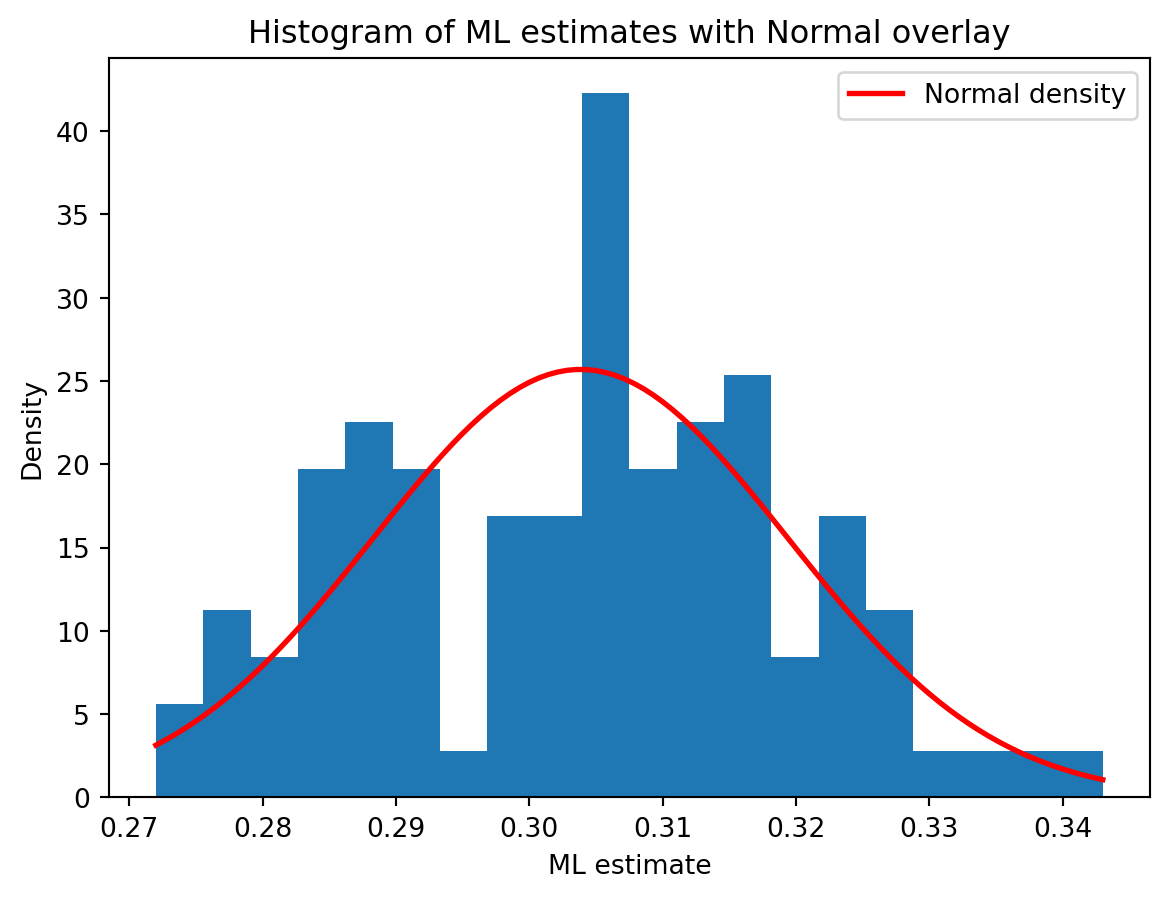

In [1]:
# Let's see how the ML estimate behaves in a simulation

import numpy as np
import matplotlib.pyplot as plt

# Number of samples
R = 100

# Sample size
n = 1000

# True parameter
p = 0.3

# Generate the samples

simulations = np.random.binomial(1, p, (R, n))

print(simulations)
# Compute the ML estimate for each sample (this is simply the sample mean)

p_ml = np.mean(simulations, axis=1)
print(p_ml)
# Plot the histogram of the ML estimates

# The mean of the ML estimates is equal to the true parameter (you need a lot of samples to see this)

print('Mean of the ML estimates:', np.mean(p_ml))

# The variance of the ML estimates is the true variance divided by the sample size

print('Variance of the ML estimates:', np.var(p_ml))


plt.hist(p_ml, bins=20, density=True)

# Overlay normal density
x = np.linspace(p_ml.min(), p_ml.max(), 100)
mean_ml = np.mean(p_ml)
var_ml = np.var(p_ml)
y_norm_dens = 1 / np.sqrt(2 * np.pi * var_ml) * np.exp(- (x - mean_ml)**2 / (2 * var_ml))


plt.plot(x, y_norm_dens, color='red', linewidth=2, label='Normal density')

plt.xlabel('ML estimate')
plt.ylabel('Density')
plt.title('Histogram of ML estimates with Normal overlay')
plt.legend()
plt.show()


## A Confidence Interval for p

We have seen that the ML estimator for $p$ is $\hat{p}_{ML} = k/n$ and that this function of the data is an unbiased and consistent estimator of $p$. As we have seen, when choosing persons at random to answer our survey question, it is unclear _who_ will be chosen (this is the very idea of random sampling). Because of this, the value of the estimator $\hat{p}_{ML}$ will vary from sample to sample (see the plot above). This means that even though the estimator is right _on average_, any single estimate we compute from a single sample may be far from the true value of $p$. To quantify the uncertainty associated with our estimate, we can construct a **confidence interval** for $p$ that will give us a range of plausible values for $p$ based on the data that we have observed.

The easiest way to derive an _approximate_ confidence interval for $p$ is to use the asymptotic normality of the ML estimator. This means that the standardized version of the ML estimator is asymptotically standard normal:

$$
\frac{\hat{p}_{ML} - p}{\sqrt{\frac{p(1 - p)}{n}}} \sim N(0, 1)
$$

We cannot use this distribution directly, because we do not know the value of $p$ (if we did, we would not need to estimate it in the first place!). However, we can use the fact that $\hat{p}_{ML}$ is a consistent estimator of $p$ to replace $p$ with $\hat{p}_{ML}$ in the standard deviation. This gives us the following approximate distribution:

$$
\frac{\hat{p}_{ML} - p}{\sqrt{\frac{\hat{p}_{ML}(1 - \hat{p}_{ML})}{n}}} \sim N(0, 1)
$$


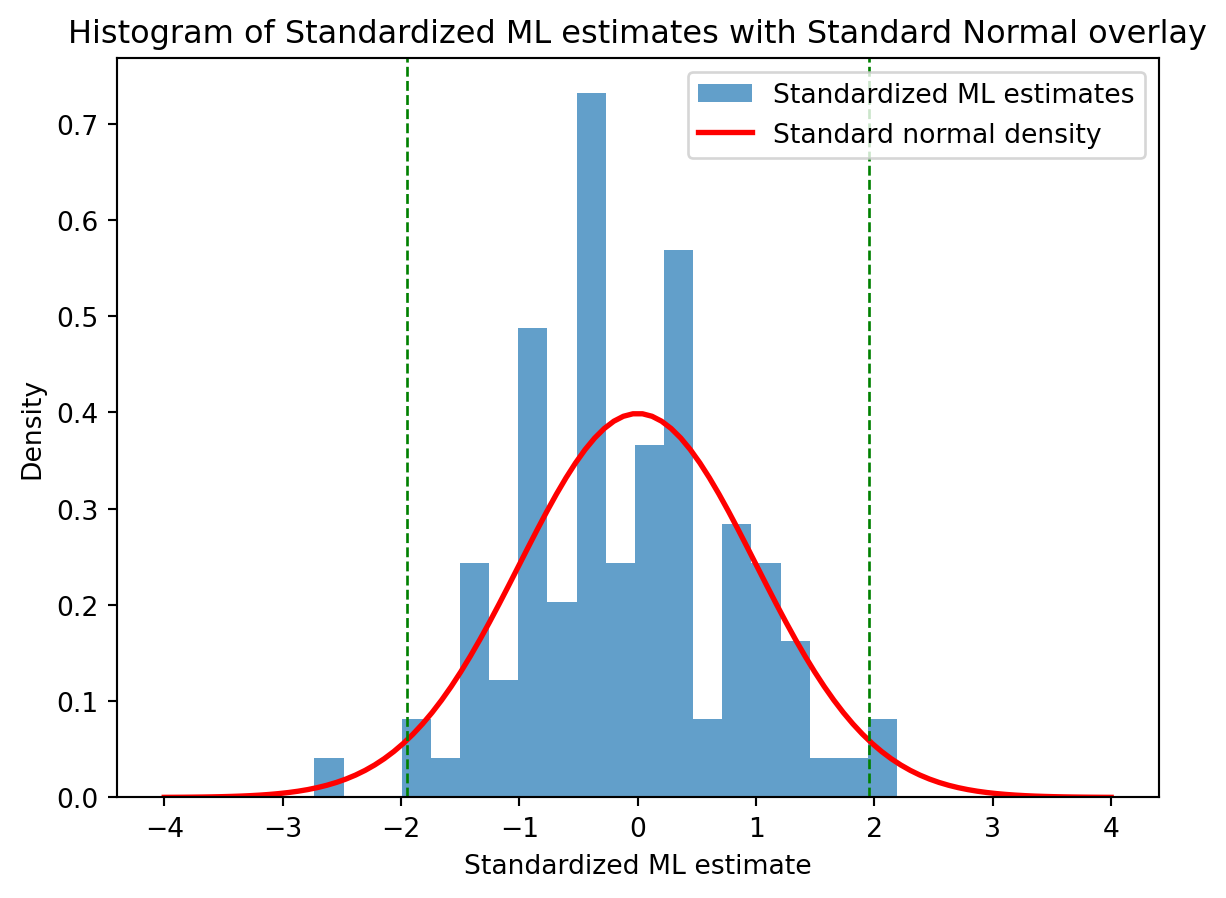

Number of standardized ML estimates within the 95% interval: 97 out of 100


In [2]:
# Number of samples
R = 100

# Sample size
n = 200

# True parameter
p = 0.3

# Generate the samples

simulations = np.random.binomial(1, p, (R, n))

# Compute the ML estimate for each sample (this is simply the sample mean)

p_ml = np.mean(simulations, axis=1)

# Compute the standardized version of the ML estimator
p_ml_std = (p_ml - p) / np.sqrt(p_ml * (1 - p_ml) / n)

# Plot histogram of the standardized ML estimator
plt.hist(p_ml_std, bins=20, density=True, alpha=0.7, label='Standardized ML estimates')

# Overlay standard normal density
z = np.linspace(-4, 4, 100)

plt.plot(z, 1/np.sqrt(2 * np.pi) * np.exp(-z**2 / 2), color='red', linewidth=2, label='Standard normal density')

plt.xlabel('Standardized ML estimate')

plt.axvline(-1.95, color='green', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='green', linestyle='dashed', linewidth=1)

plt.ylabel('Density')
plt.title('Histogram of Standardized ML estimates with Standard Normal overlay')
plt.legend()
plt.show()

# Print how many standardized estimates fall within the 95% interval

within_95 = np.sum((p_ml_std >= -1.95) & (p_ml_std <= 1.95))
print(f'Number of standardized ML estimates within the 95% interval: {within_95} out of {R}')

In [3]:
from scipy.stats import norm

# Compute the 97.5% quantile of the standard normal distribution (for a 95% confidence interval)

p  = 0.975

z_p = norm.ppf(p)
print(f"{100 * p}% quantile of the standard normal distribution: {z_p:.4f}")

# The cumulative distribution function (CDF) at z_p

print(f"norm.cdf(z_p) = {norm.cdf(z_p):.4f}")

97.5% quantile of the standard normal distribution: 1.9600
norm.cdf(z_p) = 0.9750


We can now use the property of the standard normal distribution to construct interval around zero where we expect
95 percent of all samples to fall. This interval is determined by the 2.5 and 97.5 percentiles (0.025 and 0.975 quantiles) of the standard normal distribution. These quantiles are approximately -1.96 and 1.96, respectively.

This means that we can write the following approximate probability statement:

$$
P\left(-1.96 \leq \frac{\hat{p}_{ML} - p}{\sqrt{\frac{\hat{p}_{ML}(1 - \hat{p}_{ML})}{n}}} \leq 1.96\right) \approx 0.95
$$

Next, we want to rearrange this expression so that we obtain p in the middle of two inequalities. We do this by multiplying all parts of the inequality by the standard deviation and then adding $p$ to all parts of the inequality (note that the standard deviation is always positive so the multiplication does not change the direction of the inequalities). This gives us:

$$
P\left(\hat{p}_{ML} - 1.96 \sqrt{\frac{\hat{p}_{ML}(1 - \hat{p}_{ML})}{n}} \leq p \leq \hat{p}_{ML} + 1.96 \sqrt{\frac{\hat{p}_{ML}(1 - \hat{p}_{ML})}{n}}\right) \approx 0.95
$$

Using the notation for confidence intervals, we can write this as:

$$
CI_{95\%}(p) = \left[\hat{p}_{ML} - 1.96 \sqrt{\frac{\hat{p}_{ML}(1 - \hat{p}_{ML})}{n}}, \hat{p}_{ML} + 1.96 \sqrt{\frac{\hat{p}_{ML}(1 - \hat{p}_{ML})}{n}}\right]
$$

An easy to remember rule of thumb for constructing a 95 percent confidence interval for a proportion is to use the formula:

$$
CI_{95\%}(p) = \text{estimate} \pm 2 \times \text{standard error}
$$

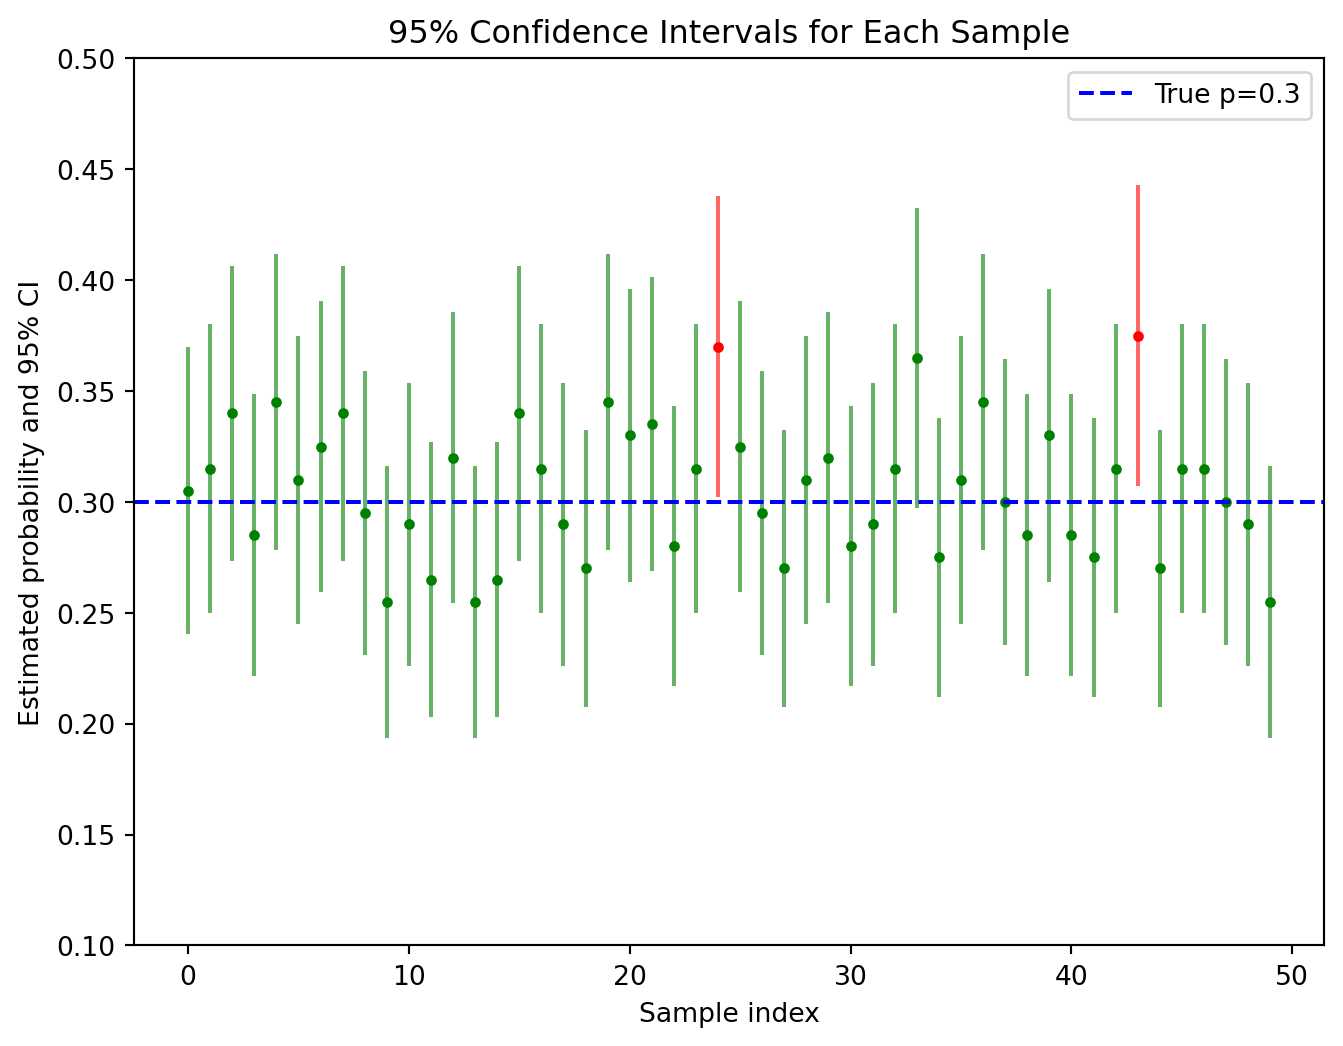

In [4]:
# Compute 95% confidence intervals for each sample's ML estimate
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)  # ≈ 1.96

# Use only the first 50 samples for plotting
p_ml_plot = p_ml[:50]

# For each selected sample, calculate the standard error and CI
se = np.sqrt(p_ml_plot * (1 - p_ml_plot) / n)
ci_lower = p_ml_plot - z_critical * se
ci_upper = p_ml_plot + z_critical * se

# Determine if the true value 0.3 is within each CI
contains_true = (ci_lower <= 0.3) & (ci_upper >= 0.3)

# Plot the confidence intervals
plt.figure(figsize=(8, 6))
for i in range(len(p_ml_plot)):
    color = 'green' if contains_true[i] else 'red'
    plt.plot([i, i], [ci_lower[i], ci_upper[i]], color=color, alpha=0.6)
    plt.plot(i, p_ml_plot[i], 'o', color=color, markersize=3)

plt.axhline(0.3, color='blue', linestyle='--', label='True p=0.3')
plt.ylim(0.1, 0.5)
plt.xlabel('Sample index')
plt.ylabel('Estimated probability and 95% CI')
plt.title('95% Confidence Intervals for Each Sample')
plt.legend()
plt.show()

## Estimation of a Normal Distribution Mean

The ML estimation method can be used to estimate the parameters of other distributions. For example, suppose that we have a random sample of $n$ observations from a normal distribution with unknown mean $\mu$ and known variance $\sigma^2$. The likelihood function of the sample is given by.

$$
L(\mu) = \prod_{i = 1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(X_i - \mu)^2}{2 \sigma^2}\right).
$$

The log-likelihood function is given by

$$
\log L(\mu) = -\frac{n}{2} \log(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i = 1}^{n} (X_i - \mu)^2.
$$

Now we need to find the value of $\mu$ that maximizes this function. The first derivative of the log-likelihood function with respect to $\mu$ is given by

$$
\frac{d}{d\mu} \log L(\mu) = \frac{1}{\sigma^2} \sum_{i = 1}^{n} (X_i - \mu).
$$

We set this derivative equal to zero and sove for $\mu$:

$$
\hat{\mu}_{ML} = \frac{1}{n} \sum_{i = 1}^{n} X_i.
$$

As in the case of the binomial distribution, the ML estimator of the mean of a normal distribution is the sample mean. The ML estimator of the mean is unbiased and consistent. To see that, calculate the expected value of the sample mean:

$$
\begin{align*}
E(\hat{\mu}_{ML}) & = E\left(\frac{1}{n} \sum_{i = 1}^{n} X_i \right) \\
& = \frac{1}{n} \sum_{i = 1}^{n} E(X_i) \\
& = \frac{1}{n} \sum_{i = 1}^{n} \mu \\
& = \mu.
\end{align*}
$$

The variance of the ML estimator of the mean of a normal distribution is given by

$$
\text{Var}(\hat{\mu}_{ML}) = \frac{\sigma^2}{n}.
$$

and obviously decreases as the sample size increases.



## Estimation of a Normal Distribution Variance

The second distribution of the normal distribution is the variance ($\sigma^2$). We can derive the ML estimator in the same way as we did for the mean by differentiating the log-likelihood function with respect to $\sigma^2$ and setting the derivative equal to zero.
Note that we are differentiating with respect to $\sigma^2$ and not $\sigma$.

$$
\begin{align*}
\frac{d}{d\sigma^2} \log L(\sigma^2) & = -\frac{n}{2 \sigma^2} + \frac{1}{2 \sigma^4} \sum_{i = 1}^{n} (X_i - \mu)^2  = 0\\
\frac{n}{2 \sigma^2} & = \frac{1}{2 \sigma^4} \sum_{i = 1}^{n} (X_i - \mu)^2 \\
\sigma^2 & = \frac{1}{n} \sum_{i = 1}^{n} (X_i - \mu)^2.
\end{align*}
$$

Unfortunately, we cannot use the result that we have obtained solving the equation directly because it involves the unknown parameter $\mu$. What we can do is to substitute the ML estimator of $\mu$ into the equation and obtain the ML estimator of the variance:


$$
\hat{\sigma}^2_{ML} = \frac{1}{n} \sum_{i = 1}^{n} (X_i - \hat{\mu}_{ML})^2.
$$


However, the ML estimator of the variance is biased (though asymptically unbiased). To correct for this bias, we can the following (corrected) estimator which you have already seen under the name of _sample variance_:

$$
\hat{\sigma}^2 = \frac{1}{n - 1} \sum_{i = 1}^{n} (X_i - \hat{\mu}_{ML})^2.
$$

Note that the difference between the sample variance and the ML estimator of the variance is the denominator and that this difference is only relevant for small samples. For large samples, the difference is negligible.


In [5]:
# Sample from a normal distribution with mean 0 and variance 1

R = 10000
n = 10

normal_samples = np.random.normal(0, 1, (R, n))

# Compute the ML estimate for mu for each sample (this is simply the sample mean)

p_ml = np.mean(normal_samples, axis=1)

# Print the average of the ML estimates

print('Mean of the ML estimates:', np.mean(p_ml))

Mean of the ML estimates: 0.005817322543320051


In [6]:
# Calculate the ML estimate for the variance

ml_estimate_variance = np.var(normal_samples, axis=1, ddof=0)

# Print the average of the ML estimates for the variance

print('Mean of the ML estimates for the variance:', np.mean(ml_estimate_variance))

Mean of the ML estimates for the variance: 0.9019585052690975


In [7]:
# Calculate the corrected ML estimate for the variance

ml_estimate_variance_corrected = np.var(normal_samples, axis=1, ddof=1)

# Print the average of the corrected ML estimates for the variance

print('Mean of the corrected ML estimates for the variance:', np.mean(ml_estimate_variance_corrected))

Mean of the corrected ML estimates for the variance: 1.0021761169656638


:::{#ex-estimation-1}

## Probability Estimation Exercise

You take random sample of 1000 persons and ask them about their political preferences. 231 of them state they would support party A in the next elections. Estimate the share of supporters of party A in the population and construct a 95% confidence interval for this share.  Can you confidently claim that party A has the support of more than 35% of the population?

:::